In [12]:
from sklearn.datasets import fetch_california_housing
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import SGDRegressor
from sklearn.pipeline import make_pipeline
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from tabular_data_class import TabularDataClean


import numpy as np
import matplotlib.pyplot as plt
import joblib

In [76]:
def create_data():
    model = TabularDataClean()
    train = model.load_airbnb('clean_tabular_data.csv')
    
    #use boston data
    # m= 100
    # X= 6*np.random.rand(m,1)-3
    # y= 2+X+0.5 * X **2 + np.random.randn(m,1)
    
    X,y=train
    y=np.ravel(y)
    X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.3, random_state=20)
    ss = StandardScaler()
    X_train = ss.fit_transform(X_train)
    X_test = ss.transform(X_test)

    for feature in X:  
        plt.plot(X[feature][:], "b-", linewidth =3, label = f"{feature}")
        plt.plot([0,10], [0,10], "k:", linewidth=2)
        plt.plot(y/100, "r--", linewidth =2, label = "Label")
        plt.legend(loc = "upper right", fontsize= 14)
        plt.xlabel("numbers", fontsize = 14)
        plt.ylabel("Price", fontsize = 14)
        plt.show()

    return X_train, X_test, y_train, y_test


     guests  beds  bathrooms  Cleanliness_rating  Accuracy_rating  \
0       2.0   1.0        1.0                 4.6              4.7   
1       3.0   3.0        0.0                 4.3              4.7   
2       4.0   2.0        1.5                 4.2              4.6   
3       2.0   1.0        1.0                 4.8              4.9   
4       4.0   3.0        1.0                 5.0              4.9   
..      ...   ...        ...                 ...              ...   
824     4.0   2.0        1.5                 4.9              5.0   
825     2.0   1.0        1.0                 4.8              5.0   
826     4.0   2.0        1.5                 4.8              5.0   
827     6.0   3.0        2.0                 4.7              4.8   
828     4.0   2.0        1.0                 4.9              4.9   

     Communication_rating  Location_rating  Check-in_rating  Value_rating  \
0                     4.3              5.0              4.3           4.3   
1                

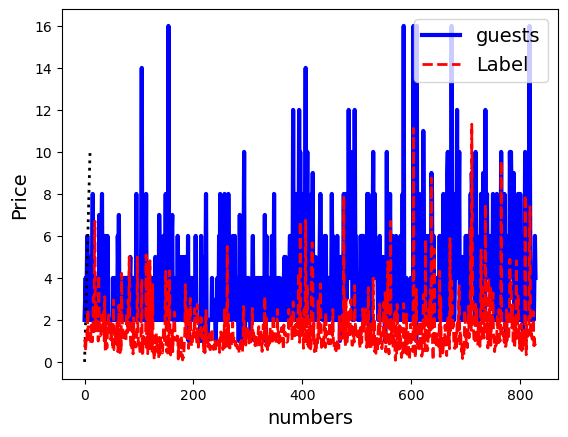

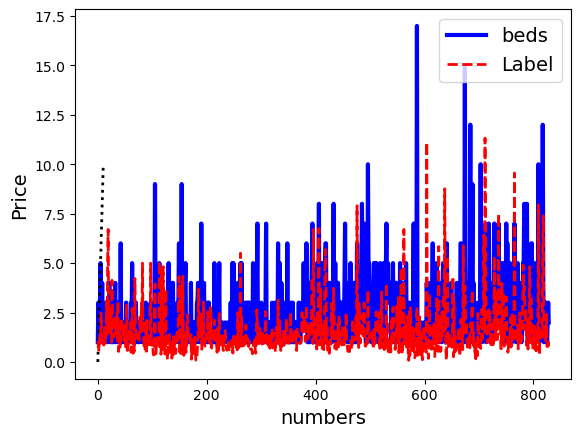

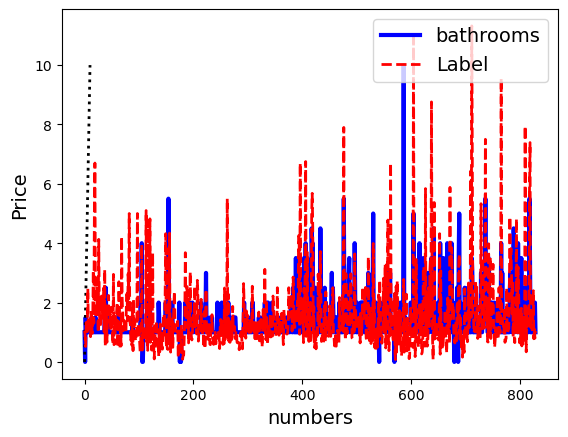

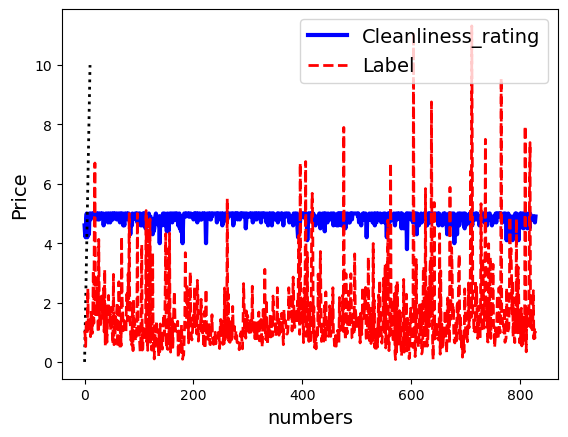

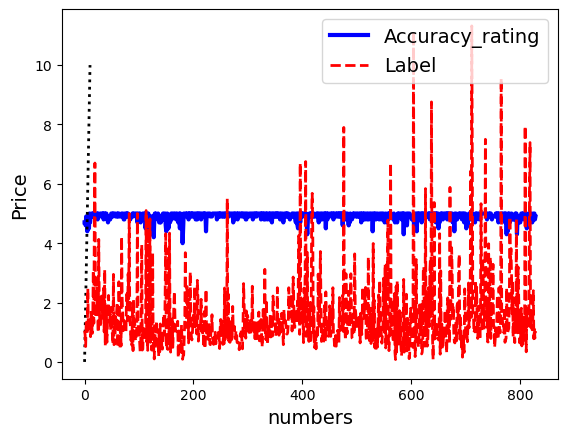

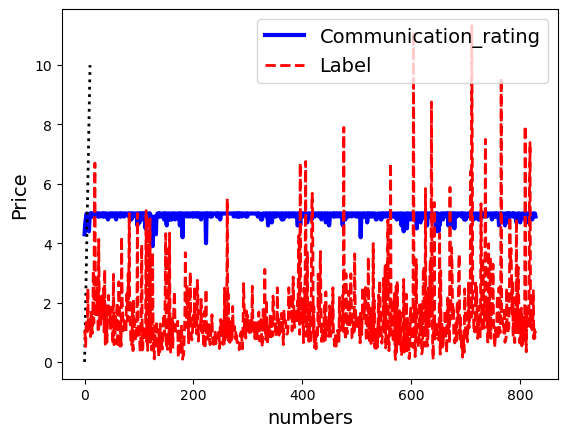

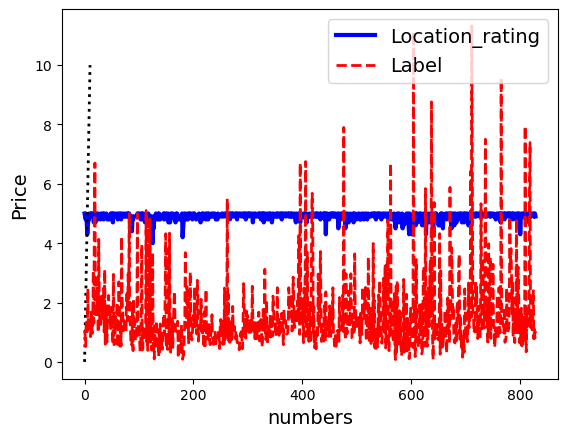

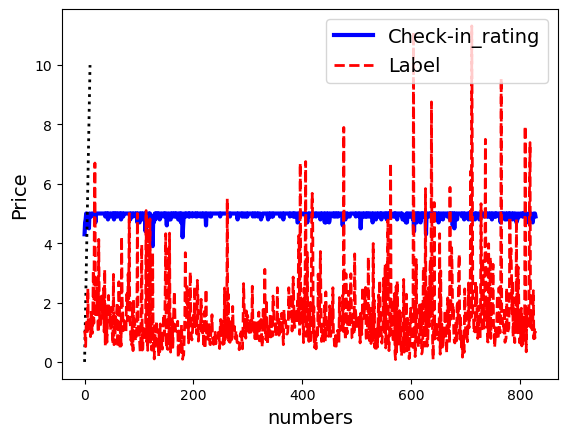

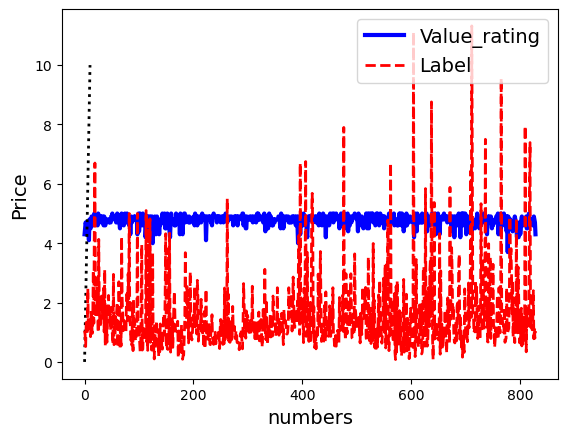

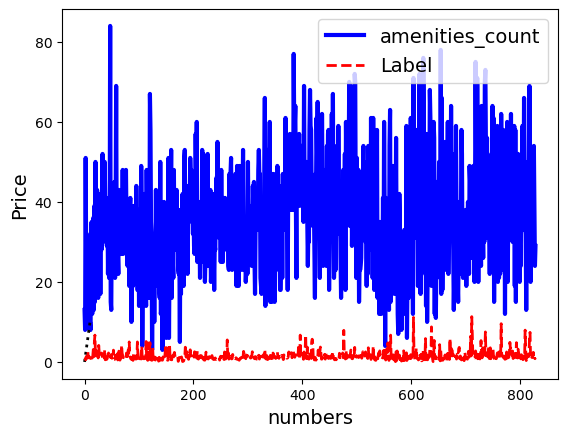

(array([[ 0.06137531,  0.36091726, -0.48190254, ..., -1.48763153,
         -0.43865306, -0.65135175],
        [ 1.77692607,  0.93286265,  0.86835578, ...,  0.51428561,
         -0.43865306, -0.5781094 ],
        [-0.36751238, -0.21102813, -0.48190254, ...,  0.51428561,
          0.15027929,  0.52052577],
        ...,
        [-0.79640007, -0.78297351, -0.48190254, ...,  0.51428561,
          0.15027929, -0.94432113],
        [-0.79640007, -0.78297351, -0.48190254, ..., -3.48954867,
         -1.02758541,  0.15431404],
        [ 0.06137531,  0.36091726, -0.48190254, ...,  0.51428561,
          0.15027929,  0.88673749]]),
 array([[ 5.20802758e+00,  8.36815267e+00,  1.16704223e+01, ...,
         -1.48763153e+00, -2.20545010e+00, -1.74998692e+00],
        [ 9.19150687e-01,  3.60917261e-01,  8.68355782e-01, ...,
         -1.48763153e+00, -2.79438245e+00, -7.24594093e-01],
        [ 6.13753073e-02,  3.60917261e-01, -4.81902539e-01, ...,
          5.14285610e-01,  1.50279289e-01,  1.54591859e+

In [77]:
create_data()

In [78]:
def get_loss_curves(model):
    X_train, X_test, y_train, y_test = create_data()
    train_errors =[]
    val_errors=[]
    n_epochs = 500

    for epoch in range(n_epochs):
        model.fit(X_train, y_train)
        y_train_predict= model.predict(X_train)
        train_errors.append(mean_squared_error(y_train, y_train_predict))

        y_test_predict = model.predict(X_test)
        val_errors.append(mean_squared_error(y_test,y_test_predict))
    best_epoch = np.argmin(val_errors)
    best_val_mse = np.sqrt(val_errors[best_epoch])
    
    plt.plot([0,n_epochs], [best_val_mse, best_val_mse], "k:", linewidth=2)
    plt.plot(np.sqrt(val_errors), "b-", linewidth =3, label = "Validation set")
    plt.plot(np.sqrt(train_errors), "r--", linewidth =2, label = "Training set")
    plt.legend(loc = "upper right", fontsize= 14)
    plt.xlabel("Epoch", fontsize = 14)
    plt.ylabel("RMSE", fontsize = 14)
    plt.show()
    print(best_val_mse)


     guests  beds  bathrooms  Cleanliness_rating  Accuracy_rating  \
0       2.0   1.0        1.0                 4.6              4.7   
1       3.0   3.0        0.0                 4.3              4.7   
2       4.0   2.0        1.5                 4.2              4.6   
3       2.0   1.0        1.0                 4.8              4.9   
4       4.0   3.0        1.0                 5.0              4.9   
..      ...   ...        ...                 ...              ...   
824     4.0   2.0        1.5                 4.9              5.0   
825     2.0   1.0        1.0                 4.8              5.0   
826     4.0   2.0        1.5                 4.8              5.0   
827     6.0   3.0        2.0                 4.7              4.8   
828     4.0   2.0        1.0                 4.9              4.9   

     Communication_rating  Location_rating  Check-in_rating  Value_rating  \
0                     4.3              5.0              4.3           4.3   
1                

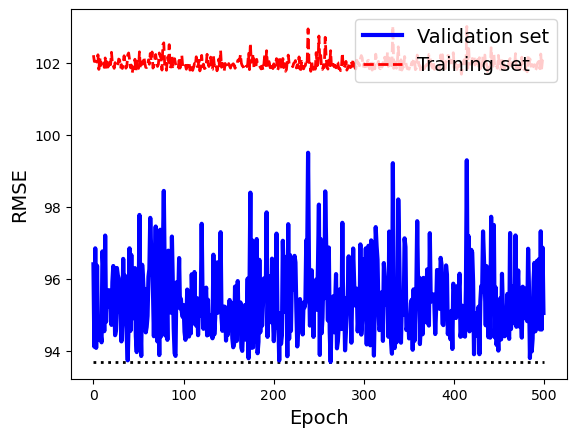

93.69408159558658


In [54]:
sgd_regressor = SGDRegressor(max_iter =10000000 , tol=np.infty)#warm_start=True)

get_loss_curves(sgd_regressor)


In [79]:
def custom_tune_regression_model_hyperparameters(model, test_sets,hyperparameter_settings):

    pass



In [106]:
from sklearn import svm, datasets
from sklearn.model_selection import GridSearchCV, RepeatedStratifiedKFold

# iris = datasets.load_iris()
model = TabularDataClean()
train = model.load_airbnb('clean_tabular_data.csv')
X,y=train
y=np.ravel(y)

param_grid = [
    {"kernel": ["linear"]},
    {"kernel": ["poly"], "degree": [2, 3]},
    {"kernel": ["rbf"]},
]
svc = svm.SVC()
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=10, random_state=0)
clf = GridSearchCV(estimator = svc,param_grid=param_grid,cv=cv)
clf.fit(X, y)
# GridSearchCV(estimator = svc, param_grid = {'C':[1,10], 'kernel':('linear','rbf')})
sorted(clf.cv_results_.keys())

import pandas as pd

results_df = pd.DataFrame(clf.cv_results_)
results_df = results_df.sort_values(by=["rank_test_score"])
results_df = results_df.set_index(
    results_df["params"].apply(lambda x: "_".join(str(val) for val in x.values()))
).rename_axis("kernel")
results_df[["params", "rank_test_score", "mean_test_score", "std_test_score"]]

c:\Users\dongc\miniconda3\envs\datascience\lib\site-packages\sklearn\model_selection\_split.py:684: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  warnings.warn(
c:\Users\dongc\miniconda3\envs\datascience\lib\site-packages\sklearn\model_selection\_split.py:684: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  warnings.warn(
c:\Users\dongc\miniconda3\envs\datascience\lib\site-packages\sklearn\model_selection\_split.py:684: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  warnings.warn(
c:\Users\dongc\miniconda3\envs\datascience\lib\site-packages\sklearn\model_selection\_split.py:684: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  warnings.warn(
c:\Users\dongc\miniconda3\envs\datascience\lib\site-packages\sklearn\model_selection\_split.py:684: UserWarning: The least populated class in y has 

,params,rank_test_score,mean_test_score,std_test_score
kernel,,,,
3_poly,"{'degree': 3, 'kernel': 'poly'}",1,0.018703,0.009709
rbf,{'kernel': 'rbf'},2,0.018341,0.009109
2_poly,"{'degree': 2, 'kernel': 'poly'}",3,0.017856,0.008613
linear,{'kernel': 'linear'},4,0.010369,0.010227


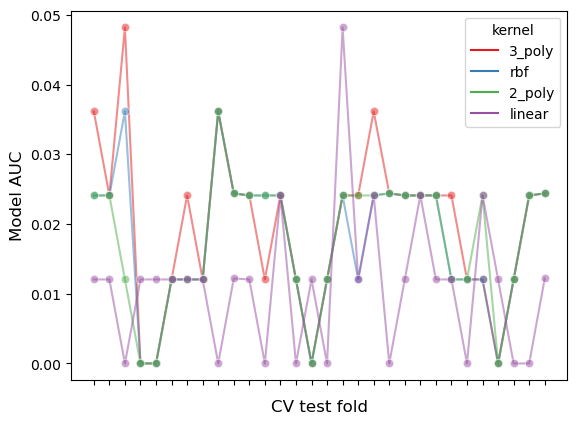

Correlation of models:
 kernel    3_poly       rbf    2_poly    linear
kernel                                        
3_poly  1.000000  0.748370  0.689908 -0.034691
rbf     0.748370  1.000000  0.817599 -0.043491
2_poly  0.689908  0.817599  1.000000  0.076991
linear -0.034691 -0.043491  0.076991  1.000000


In [107]:
import seaborn as sns

model_scores = results_df.filter(regex=r"split\d*_test_score")

fig, ax = plt.subplots()
sns.lineplot(
    data=model_scores.transpose().iloc[:30],
    dashes=False,
    palette="Set1",
    marker="o",
    alpha=0.5,
    ax=ax,
)
ax.set_xlabel("CV test fold", size=12, labelpad=10)
ax.set_ylabel("Model AUC", size=12)
ax.tick_params(bottom=True, labelbottom=False)
plt.show()

# print correlation of AUC scores across folds
print(f"Correlation of models:\n {model_scores.transpose().corr()}")

In [108]:
from scipy.stats import t

def corrected_std(differences, n_train, n_test):
    """Corrects standard deviation using Nadeau and Bengio's approach.

    Parameters
    ----------
    differences : ndarray of shape (n_samples,)
        Vector containing the differences in the score metrics of two models.
    n_train : int
        Number of samples in the training set.
    n_test : int
        Number of samples in the testing set.

    Returns
    -------
    corrected_std : float
        Variance-corrected standard deviation of the set of differences.
    """
    # kr = k times r, r times repeated k-fold crossvalidation,
    # kr equals the number of times the model was evaluated
    kr = len(differences)
    corrected_var = np.var(differences, ddof=1) * (1 / kr + n_test / n_train)
    corrected_std = np.sqrt(corrected_var)
    return corrected_std


def compute_corrected_ttest(differences, df, n_train, n_test):
    """Computes right-tailed paired t-test with corrected variance.

    Parameters
    ----------
    differences : array-like of shape (n_samples,)
        Vector containing the differences in the score metrics of two models.
    df : int
        Degrees of freedom.
    n_train : int
        Number of samples in the training set.
    n_test : int
        Number of samples in the testing set.

    Returns
    -------
    t_stat : float
        Variance-corrected t-statistic.
    p_val : float
        Variance-corrected p-value.
    """
    mean = np.mean(differences)
    std = corrected_std(differences, n_train, n_test)
    t_stat = mean / std
    p_val = t.sf(np.abs(t_stat), df)  # right-tailed t-test
    return t_stat, p_val


model_1_scores = model_scores.iloc[0].values  # scores of the best model
model_2_scores = model_scores.iloc[1].values  # scores of the second-best model

differences = model_1_scores - model_2_scores

n = differences.shape[0]  # number of test sets
df = n - 1

n_train = len(list(cv.split(X, y))[0][0])
n_test = len(list(cv.split(X, y))[0][1])

t_stat, p_val = compute_corrected_ttest(differences, df, n_train, n_test)
print(f"Corrected t-value: {t_stat:.3f}\nCorrected p-value: {p_val:.3f}")

Corrected t-value: 0.154
Corrected p-value: 0.439


c:\Users\dongc\miniconda3\envs\datascience\lib\site-packages\sklearn\model_selection\_split.py:684: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  warnings.warn(
c:\Users\dongc\miniconda3\envs\datascience\lib\site-packages\sklearn\model_selection\_split.py:684: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  warnings.warn(
c:\Users\dongc\miniconda3\envs\datascience\lib\site-packages\sklearn\model_selection\_split.py:684: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  warnings.warn(
c:\Users\dongc\miniconda3\envs\datascience\lib\site-packages\sklearn\model_selection\_split.py:684: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  warnings.warn(
c:\Users\dongc\miniconda3\envs\datascience\lib\site-packages\sklearn\model_selection\_split.py:684: UserWarning: The least populated class in y has 

In [109]:
t_stat_uncorrected = np.mean(differences) / np.sqrt(np.var(differences, ddof=1) / n)
p_val_uncorrected = t.sf(np.abs(t_stat_uncorrected), df)

print(
    f"Uncorrected t-value: {t_stat_uncorrected:.3f}\n"
    f"Uncorrected p-value: {p_val_uncorrected:.3f}"
)

Uncorrected t-value: 0.537
Uncorrected p-value: 0.296
